###데이터 준비

In [1]:
import matplotlib.pyplot as plt                       # 그래프 패키지
import pandas as pd
import numpy as np                                    # 배열 패키지

from sklearn.neighbors import KNeighborsClassifier    # k-최근접 이웃

from sklearn.neighbors import KNeighborsRegressor     # k-최근접 회귀
from sklearn.linear_model import LinearRegression     # 선형 회귀
from sklearn.linear_model import Ridge                # 릿지 선형 클래스

from sklearn.model_selection import train_test_split  # 데이터 셋 분할

from sklearn.metrics import mean_absolute_error       # MSE(Mean Absolutr Err)
from sklearn.metrics import mean_squared_error        # MSE(Mean Squared Err)

In [2]:
# 데이터 셋

# 도미 데이터 길이(cm) 및 무게(g)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어 데이터 길이(cm) 및 무게(g)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

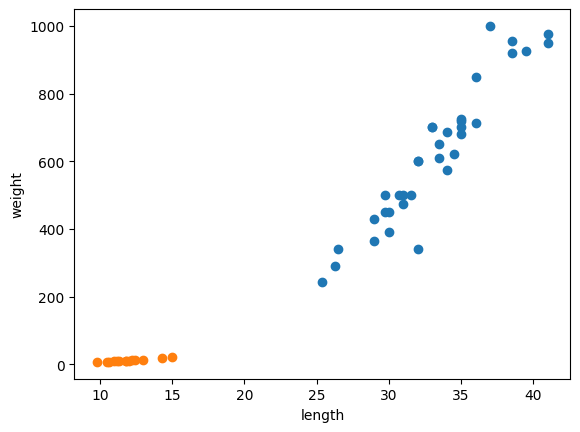

In [3]:
# 도미와 빙어 데이터 셋 산점도
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련 데이터와 타겟 데이터 생성

In [4]:
# 입력(특성)데이터 생성
# length , height 모두 list형
length = bream_length + smelt_length     # 빙어및 도미 데이터 길이(cm)
weight = bream_weight + smelt_weight     # 빙어및 도미 데이터 무게(g)

In [5]:
# 입력 데이터 생성
# 인공지능 입력 데이터는 2차원으로 구성
# 2차원 특성 생성(행 : 샘플수 / 열 특상)
fish_data = [[l, w] for l, w in zip(length, weight)]

fish_data = np.array(fish_data)             # 리스트를 배열로 변환
print(fish_data)
print(np.array(fish_data).shape)            # 리스트 자료형은 shape 함수 실행 안됨

# 타겟 데이터 생성
fish_target = [1]*35 + [0]*14
print(fish_target)
print(np.array(fish_target).shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(49,)


### k-최근접 이웃 알고리즘

In [6]:
kn = KNeighborsClassifier()                # k-최근접 이웃 모델 생성
kn.fit(fish_data, fish_target)             # 학습
print(kn.score(fish_data, fish_target))    # 훈련 데이터 평가
print(kn.score(fish_data, fish_target))    # 테스트 데이터 평가

1.0
1.0


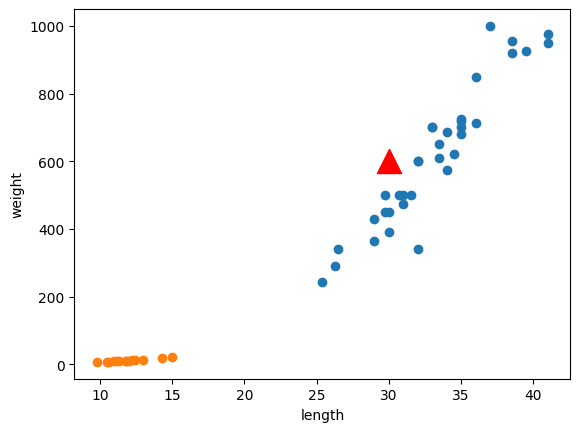

array([1])

In [7]:
# 특정 데이터 산점도
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.scatter(30, 600, c = 'r', s = 300, marker='^')                 # 특정 도미 산점도

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.predict([[30, 600]])    # 도미로 예측

### 정확도 생각해보기

In [8]:
# 모든 샘플을 이웃으로 했을 때 정확도는 ?
kn49 = KNeighborsClassifier(n_neighbors=49)    # 이웃을 49 개로 설정
kn49.fit(fish_data, fish_target)     # 학습
kn49.score(fish_data, fish_target)   # 평가(정확도)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


### 샘플링 편향(Samplint Bias)

In [9]:
# 데이터 셋
# 생선 길이 데이터 : 49개 샘플
# 생선 무게 데이터 : 49개 샘플
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [14]:
# 입력 데이터(2차원으로 변경) : 특성(길이, 무게)
# 타겟 데이터 : 도미(양성:35) / 빙어(음성:14)
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

# 리스트를 배열로 변환(인공지능은 빅 데이터)
# 빅 데이터 이기 대문에 연산 속도가 빠른 배열로 변환해야 함
fish_data = np.array(fish_data)
fish_target = np.array(fish_target)

print("입력 데이터 : ", fish_data.shape)
print("타겟 데이터 : ", fish_target.shape)

입력 데이터 :  (49, 2)
타겟 데이터 :  (49,)


In [18]:
# 훈련 셋 슬라이싱(도미 데이터)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 셋 슬라이싱(빙어 데이터)
test_input = fish_data[35:]
test_target = fish_target[35:]

# 도미 데이터
print("훈련 입력 데이터 : ", train_input.shape)
print("훈련 타겟 데이터 : ", train_target.shape)

# 빙어 데이터
print("테스트 입력 데이터 : ", test_input.shape)
print("테스트 타겟 데이터 : ", test_target.shape)

훈련 입력 데이터 :  (35, 2)
훈련 타겟 데이터 :  (35,)
테스트 입력 데이터 :  (14, 2)
테스트 타겟 데이터 :  (14,)


In [19]:
kn = KNeighborsClassifier()                    # k-최근접 이웃 모델 생성
kn.fit(train_input, train_target)              # 학습
# 샘플링 편향 결과
# 도미 데이터로 훈련하고 테스트 데이터로 평가한 결과
print(kn.score(train_input, train_target))     # 훈련 데이터 평가
print(kn.score(test_input, test_target))       # 테스트 데이터평가

1.0
0.0


## 사이킷런으로 훈련 세트와 테스트

In [21]:
# 입력 데이터 셋과 테스트 데이터 셋 매개변수로 받음
# 훈련 셋(입력 셋, 타겟 셋), 테스트 셋(입력 셋, 타겟 셋) 분할
# 디폴트로 7.5 : 2.5로 나눔
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target, random_state=42)

In [23]:
# 다소 편향이 있는 데이터 셋
print(test_target)                             # 테스트 타겟 셋의 실제 값 확인

# 샘플링 편향을 줄이는 방법(stratify=fish_targe)
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)

[0 0 1 0 1 0 1 1 1 1 1 1 1]
[0 0 1 0 1 0 1 1 1 1 1 1 1]


### 표준화 : 각 열의 기준을 맞추는 과정

In [25]:
# 도미를 빙어로 예측한 오류 상황
# 오류의 이유는 각 열의 크기가 다르기 때문 -> 정규화로 각 열의 크기를 맞춰 줘야 한다
print(train_input[0 : 5])

[[ 29.7 500. ]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 11.3   8.7]
 [ 39.5 925. ]]


In [26]:
# 입력 훈련 데이터에 대한 표준화
mean = np.mean(train_input, axis=0)          # 평균
std = np.std(train_input, axis=0)            # 표준 편차

train_scaled = (train_input - mean) / std    # 훈련 셋 표준화

print(train_scaled[0 : 5])                   # 표준화 결과

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


In [27]:
kn = KNeighborsClassifier()                    # k-최근접 이웃 모델 생성
kn.fit(train_scaled, train_target)             # 표준 점수로 학습

test_scaled = (test_input - mean) / std        # 테스트 셋 표준화
kn.score(test_scaled, test_target)             # 데스트 데이터 평가

1.0

In [28]:
# 수상한 도미를 제대로 예측한 결과 보기
new = ([25, 150] - mean) / std        # 수상한 도미 표준점수
print(kn.predict([new]))              # 새로운 도미 데이터의 예측

[1]


# k-최근접 이웃 회귀
길이로 무게 예측

In [30]:
# 데이터 셋 : 도미 데이터의 길이와 무게
perch_length = np.array(    # 입력 셋(특성) : 길이
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(   # 타겟 : 무게
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [31]:
# 훈련 및 테스트 셋 분할
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print("입력 데이터 : ", train_input.shape)                    # 입력 데이터가 1차원 배열임
print("타겟 데이터 : ", test_input.shape)

입력 데이터 :  (42,)
타겟 데이터 :  (14,)


In [32]:
# 2 차원 배열로 변경(중요)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print("입력 데이터 : ", train_input.shape)                    # 입력 데이터가 1차원 배열임
print("타겟 데이터 : ", test_input.shape)

입력 데이터 :  (42, 1)
타겟 데이터 :  (14, 1)


In [33]:
knr = KNeighborsRegressor()                  # k-최근접 이웃 회귀 모델 생성
knr.n_neighbors = 3                          # 이웃 갯수 설정
knr.fit(train_input, train_target)           # 모델 학습

KNeighborsRegressor(n_neighbors=3)

모델 평가 지수

In [35]:
print("결정 계수로 모델 평가")
print(knr.score(train_input, train_target))      # 훈련 데이터 모델 평가 - 결정 계수
print(knr.score(test_input, test_target))        # 테스트 데이터 모델 평가 - 결정 계수
print()

# 테스트 세트에 대한 예측 값
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 모델 평가 지수들
mae = mean_absolute_error(test_target, test_prediction)
print("MAE  : ", mae)

mse = mean_squared_error(test_target, test_prediction)
print("MSE  : ",mse)

rmse = mse**0.5
print("RMSE : ",rmse)

결졍 계수로 모델 평가
0.9804899950518966
0.9746459963987609

MAE  :  35.42380952380951
MSE  :  2544.847142857142
RMSE :  50.44647800250422


## 과대적합 vs 과소적합

0.9852830341215901
0.991309195814175


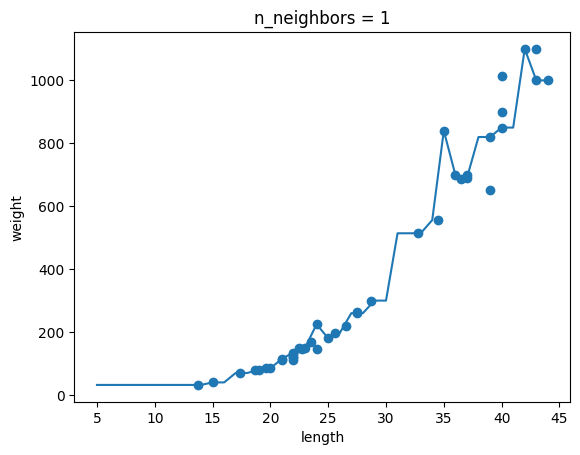

0.9804899950518966
0.9746459963987609


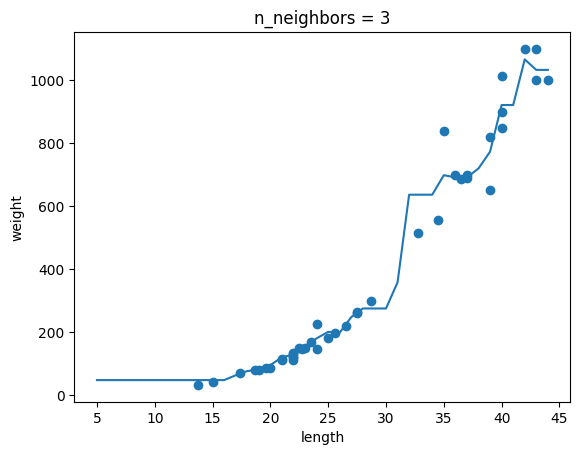

0.9698823289099254
0.992809406101064


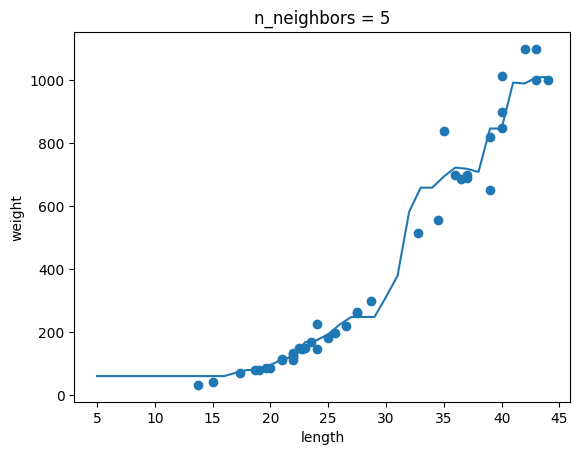

In [36]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 3, 5]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    print(knr.score(train_input, train_target))  # 모델 평가 : 학습 데이터
    print(knr.score(test_input, test_target))    # 모델 평가  : 테스트 데이터

    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

## k-최근접 이웃의 한계

In [37]:
knr = KNeighborsRegressor()           # k-최근접 이웃 회귀 모델
knr.n_neighbors = 3
knr.fit(train_input, train_target)
# 실제 무게는 1500g 인데 예측 오차가 매우 크다
print(knr.predict([[50]]))    # 도미 50 cm 예측

[1033.33333333]


In [38]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])
print(indexes)

[[34  8 14]]


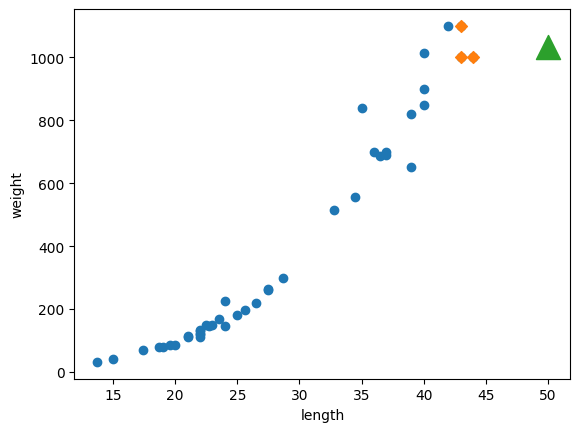

In [39]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^', s = 300)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
# 40 cm 이상은 도일한 무게로 얘측하는 문재 발생
print(knr.predict([[100]]))    # 도미 100cm 에측도 50cm 와 동일
print(knr.predict([[200]]))    # 도미 200cm 에측도 50cm 와 동일

[1033.33333333]
[1033.33333333]


## 선형 회귀

In [41]:
print(train_input.shape)    # 도미의 길이
print(test_input.shape)     # 도미의 길이
print(train_target.shape)   # 도미의 길이
print(test_target.shape)    # 도미의 길이

(42, 1)
(14, 1)
(42,)
(14,)


In [42]:
lr = LinearRegression()                        # 선형 회귀 모델
lr.fit(train_input, train_target)              # 선형 회귀 모델 훈련
print(lr.score(train_input, train_target))     # 훈련 데이터 모델 평가 - 결정 계수
print(lr.score(test_input, test_target))       # 테스트 데이터 모델 평가 - 결정 계수

0.939846333997604
0.8247503123313558


In [44]:
print(lr.predict([[50]]))                    # 50cm 농어에 대한 예측
# 원래는 1500g 인데 오차가 큼

[1241.83860323]


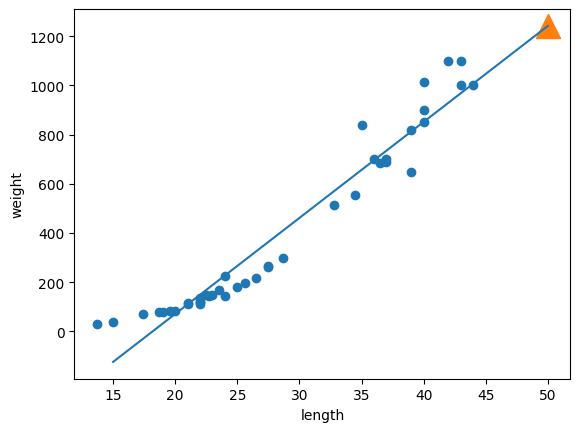

In [45]:
plt.scatter(train_input, train_target)  # 훈련 세트의 산점도
# 15에서 50까지 1차 방정식 직선 그래프(선형 모델 학습 그래프)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^', s = 300)    # 50cm 농어 데이터 산점도

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 다항 회귀(Polynomial Regression)

In [47]:
# 학습 셋과 테스트 셋의 길이에 대해 제곱항을 하나 더 만듭니다.
train_poly = np.column_stack((train_input ** 2, train_input))      # 특성 열 하나(길이의 제곱) 추가
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)  # 훈련셋과 테스트 셋의 크기 확인

(42, 2) (14, 2)


In [48]:
lr = LinearRegression()                              # 선형 회귀 모델
lr.fit(train_poly, train_target)                    # 선형 회귀 모델 훈련

print(lr.score(train_poly, train_target))            # 훈련데이터 퍙가
print(lr.score(test_poly, test_target))              # 테스트 데이터 평가

# 제대로 무게 예측
print(lr.predict([[50**2, 50]]))        # 예측

0.9706807451768623
0.9775935108325122
[1573.98423528]


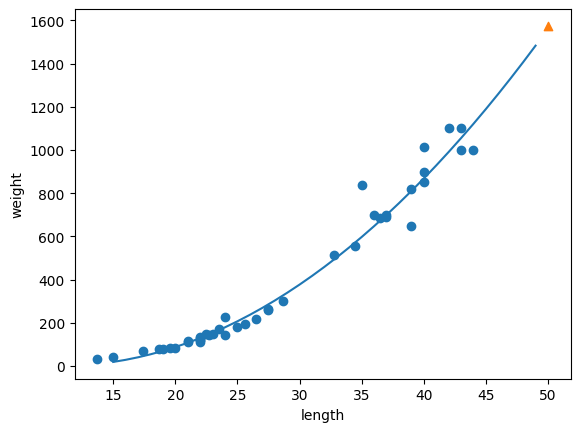

In [49]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<h3>다중회귀(multiple regression)</h3>
*   여러 개의 특성을 이용한 선형회귀<br>
*   선형 회귀 방정식<br>
*   타깃 = a × (특성1) + b × (특성2) + 절편

In [50]:
# 판다스(pandas)의 데이터프레임(dataframe) : 엑셀과 유사한 포멧 형식
# csv 파일을 데이터 데이터프레임(dataframe)형식으로 로딩
df = pd.read_csv('https://bit.ly/perch_csv_data')

print(df.head())    # 처음부터 5개 샘플 보여줌
print(df.info())    # 데이터 정보를 보여줌

   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB
None


In [51]:
perch_full = df.to_numpy()       # 데이터 프레임을 배열로 변환
print(perch_full.shape)
print(perch_full[ : 5])          # 입력(특성 데이터) -> 농어의 길이, 높이, 두께

(56, 3)
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [52]:
perch_weight = np.array(       # 농어 무게(타겟)
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
print(perch_weight.shape)

(56,)


In [53]:
from sklearn.model_selection import train_test_split   # 훈련 및 테스트 셋 분할
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

print(train_input.shape)   # 데이터 셋 스케일
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(42, 3)
(42,)
(14, 3)
(14,)


In [54]:
lr = LinearRegression()                 # 선형 회귀 모델 생성
lr.fit(train_input, train_target)       # 학습

print(lr.score(train_input, train_target))    # 훈련 셋의 결과는 우수
print(lr.score(test_input, test_target))      # 테스트 셋의 결과는 문제

0.9615899053354737
0.8759076448189822


# 특성 공학과 규제
## 사이킷런의 변환기

In [55]:
from sklearn.preprocessing import PolynomialFeatures   # 변환기 클래스

poly = PolynomialFeatures()         # 특성 변환기 객체
poly.fit([[2, 3]])                  # 2개의 특성, 특성의 제곱, 특성의 곱, 절편 변환 훈련
print(poly.transform([[2, 3]]))     # 여기서 특성 변함
poly.get_feature_names_out()        # 변한 특성 확인

[[1. 2. 3. 4. 6. 9.]]


array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [56]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()   # 입력 데이터
print(perch_full)                 # 길이, 높이, 넓이

perch_weight = np.array(       # 무게(타겟)
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [57]:
# 훈련 및 테스트 셋 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

In [60]:
from sklearn.preprocessing import PolynomialFeatures    # 변환가 쿨래스
poly = PolynomialFeatures(include_bias=False)           # 변환기 객체

poly.fit(train_input)                                   # 3개의 특성을 가지 샘플 훈련
train_poly = poly.transform(train_input)                # 훈련 셋 변환
test_poly = poly.transform(test_input)                  # 테스트 셋 변환

print(poly.get_feature_names_out())                            # 변환 결과 출력

print(train_poly.shape)      # 락습 셋 (42, 9)
print(test_poly.shape)       # 테스트 셋 (14, 9)

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
(42, 9)
(14, 9)


In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()                # 회귀 모델
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9913678156924619
0.9755690935374114


degree = 5

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()                        # 모델
lr.fit(train_poly, train_target)                 # 훈련

# 5 제곱 특성까지 변환
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)                              # 3개의 특성을 가지 샘플 훈련
train_poly = poly.transform(train_input)  # 훈련 셋 변환
test_poly = poly.transform(test_input)    # 테스트 셋 변환

print(train_poly.shape)                         #  (42, 55) 훈련 셋 스케일

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))    # 0.9999999999996433
print(lr.score(test_poly, test_target))       # -144.40579436844948

(42, 55)
0.9999999990284071
-651.7825263360792


### 규제
학습을 방해하는 릿지 알고리즘이 추가된 선형회귀

In [64]:
from sklearn.preprocessing import StandardScaler     # 정규화 클래스

ss = StandardScaler()                                # 정규화 객체
ss.fit(train_poly)                                   # 훈련 셋으로 정규화 학습

train_scaled = ss.transform(train_poly)              # 훈련 셋을 정규화
test_scaled = ss.transform(test_poly)                # 테스트 셋을 정규화

In [65]:
from sklearn.linear_model import Ridge             # 릿지 선형 회귀 클래스

ridge = Ridge()                                    # 릿지 선형 회귀 모델
ridge.fit(train_scaled, train_target)              # 훈련

print(ridge.score(train_scaled, train_target))     # 훈련 셋 평가
print(ridge.score(test_scaled, test_target))      # 테스트 셋 평가

0.9890809803294569
0.9880687401846499
